# Assignment on Model Selection

Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Load the dataset into python environment

In [2]:
data = pd.read_csv(r"C:\Users\anugr\Downloads\titanic_dataset (3).csv")

In [3]:
data.head() # displaying first five rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the basic details of the dataset

In [4]:
#checking shape of the dataset
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.duplicated().value_counts()

False    891
dtype: int64

          .No duplicate row is present in the dataset

In [8]:
#making 'PassengerId' as the index column.
data.set_index('PassengerId' , inplace =True)
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 2.Do all the necessary pre-processing steps

### Handling the missing values

In [9]:
# count of missing values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# percentage of missing values
data.isnull().sum()*100/len(data)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [11]:
# Since more than 77 % of data in the Cabin column are nulla values, we are dropping that column.If the null values of 'Cabin' column are filled with mode, there is a chance for biasing in our data set. 

In [12]:
# dropping 'Cabin' column 
data.drop('Cabin', axis=1, inplace = True)

In [13]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Checking the distribution of the Age column and filling missing values

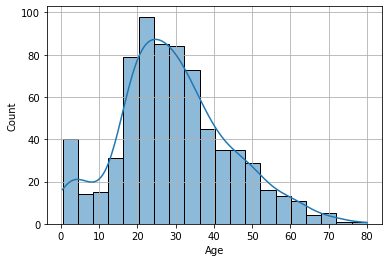

In [14]:
sns.histplot(data =data , x='Age' , kde = True)
plt.grid()

In [15]:
#since the data is slightly skewed, we are filling missing values with median

In [16]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [17]:
# Filling the missing values in the embarked column with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [18]:
data[['Age', 'Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

Now we have completly treated our missing values in the data set.

In [19]:
#Checking for unique values in 'Name' and 'Ticket' column.

In [20]:
data[['Name', 'Ticket']].nunique()

Name      891
Ticket    681
dtype: int64

Name and Ticket columns contains only unique values ,so those columns can be dropped.

In [21]:
data1 = data.drop([ 'Name' , 'Ticket'], axis =1)

### Checking for Outliers

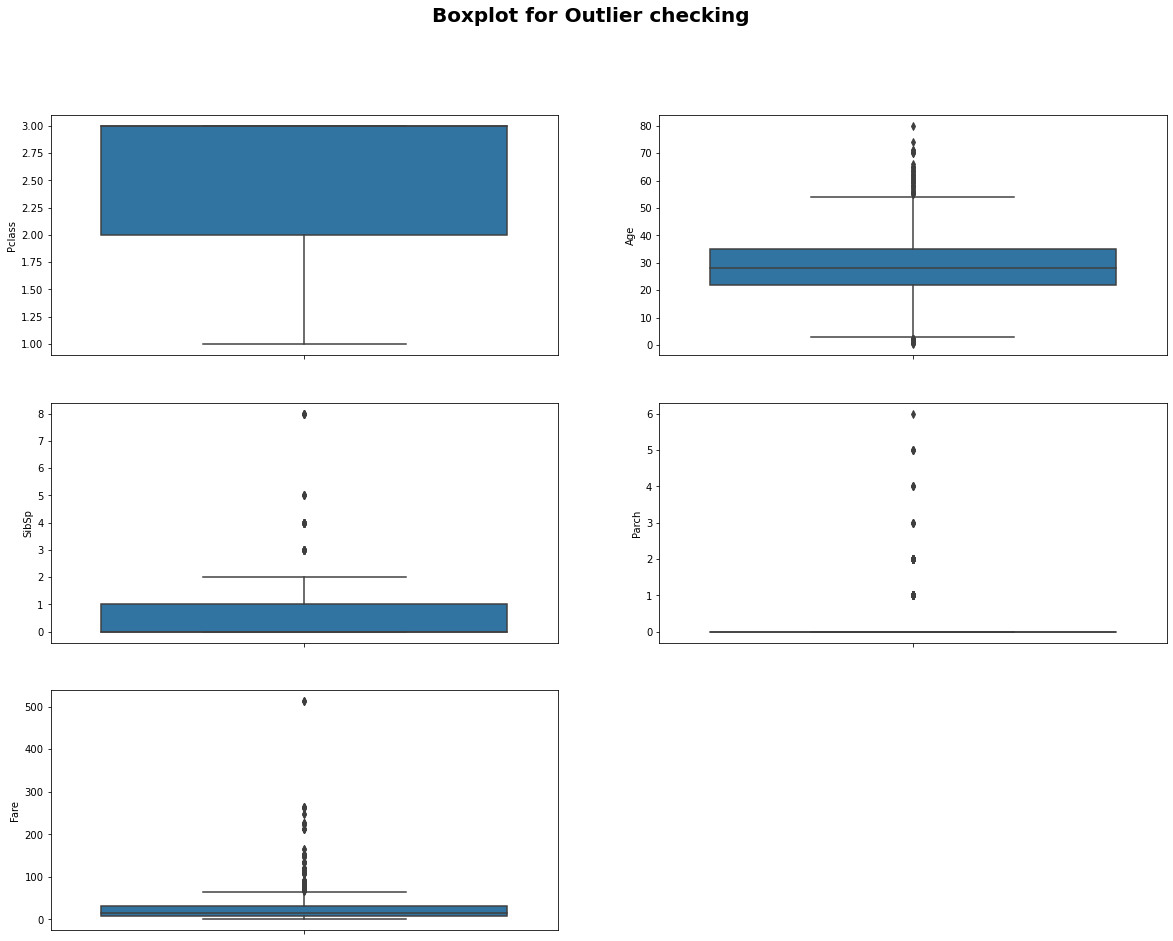

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.boxplot(data=data1,y='Pclass')
plt.subplot(3,2,2)
sns.boxplot(data=data1,y='Age')
plt.subplot(3,2,3)
sns.boxplot(data=data1,y='SibSp')
plt.subplot(3,2,4)
sns.boxplot(data=data1,y='Parch')
plt.subplot(3,2,5)
sns.boxplot(data=data1,y='Fare')
plt.suptitle('Boxplot for Outlier checking',fontsize=20,fontweight='bold');

### Checking correlation

<AxesSubplot:>

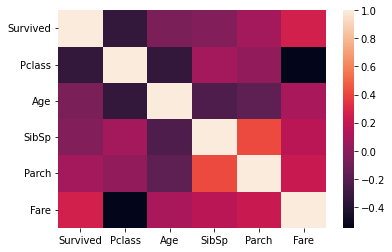

In [23]:
sns.heatmap(data1.corr())

<AxesSubplot:xlabel='Survived'>

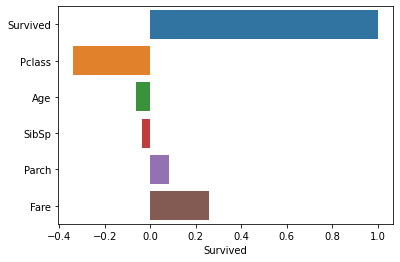

In [24]:
#Barplot of correlation of survived column with other columns
sns.barplot(x=data1.corr().Survived,y=data1.corr().columns)

Survived column is negatively correlated with Pclass ,Age, Sibsp and positively correlated with Parch and Fare columns

### One hot encoding

In [25]:
data1 = pd.get_dummies(data1)

In [26]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Min- Max Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0,1)) # creating instance

In [28]:
#Preparing list of columns for scaling
cols_scale = ['Age', 'Fare']

In [29]:
#Applying min max scaling
data1[cols_scale] = minmax.fit_transform(data1[cols_scale])

In [30]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,0.271174,1,0,0.014151,0,1,0,0,1
2,1,1,0.472229,1,0,0.139136,1,0,1,0,0
3,1,3,0.321438,0,0,0.015469,1,0,0,0,1
4,1,1,0.434531,1,0,0.103644,1,0,0,0,1
5,0,3,0.434531,0,0,0.015713,0,1,0,0,1


The target column Survived is categorical, so Classification algorithms are used for building models.

##### 3.Create kNN and SVM models.
##### 4.Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models 

In [31]:
#Splitting the data into features and target
x = data1.drop('Survived', axis =1) # features
y = data1['Survived'] # target

In [32]:
#splitting the dataset into training & testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [33]:
#for classification algorithm models for validation checking confusion matrix,accuracy score,precision score and recall score can be used
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

# 1) KNN Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier #importing knn classifier
metric_knn =[]# empty list for appending accuracy of model for each k values
n_neighbors=np.arange(3,15)#k value from 3 to 14
for k in n_neighbors:#for loop for looping through each k values
 knn_clf=KNeighborsClassifier(n_neighbors=k)#creating an instance of knn classifier
 model_knn=knn_clf.fit(x_train,y_train)#model creation
 y_pred_knn=model_knn.predict(x_test)#predicting using xtest
 acc=accuracy_score(y_test,y_pred_knn)#accuracy calculations
 metric_knn.append(acc)#appending accuracy of model for each k values

In [35]:
metric_knn#printing the accuracy score values array

[0.7713004484304933,
 0.7892376681614349,
 0.8026905829596412,
 0.7982062780269058,
 0.7802690582959642,
 0.7713004484304933,
 0.7757847533632287,
 0.8071748878923767,
 0.7937219730941704,
 0.8026905829596412,
 0.7937219730941704,
 0.7982062780269058]

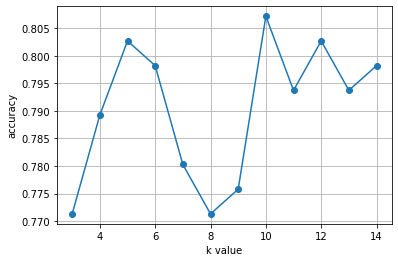

In [36]:
#Ploting line graph of accuracy of model for each value of k 
plt.plot(n_neighbors,metric_knn,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

From the above we can infer that maximum accuracy is attained when k = 10

In [37]:
# creating model using k=10
knn_clf=KNeighborsClassifier(n_neighbors=10)
model_knn=knn_clf.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

In [38]:
print(confusion_matrix(y_test,y_pred_knn))

[[121  13]
 [ 30  59]]


In [39]:
print(precision_score(y_test,y_pred_knn))

0.8194444444444444


In [40]:
print(accuracy_score(y_test,y_pred_knn))#accuracy score

0.8071748878923767


### 1. a)K Fold Cross Validation of KNN Model

In [41]:
from sklearn.model_selection import KFold#importing K-Folds cross-validator

In [42]:
kfold_validator_knn=KFold(10,shuffle=True,random_state=42)#number of folds=10 , shuffle =True to avoid fit failed warning error

In [43]:
for train_index,test_index in kfold_validator_knn.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

Training Index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  64  65  68  69  71  73  74  75  76  77  78  79  80
  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 138 139
 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197 199
 200 201 202 203 205 206 207 209 212 213 214 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241
 242 243 245 246 247 248 249 251 252 253 255 256 257 258 259 260 261 262
 263 264 265 267 268 269 270 271 272

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cv_result_knn=cross_val_score(model_knn,x,y,cv=kfold_validator_knn)

In [46]:
cv_result_knn#k fold cross validation scores


array([0.81111111, 0.7752809 , 0.80898876, 0.7752809 , 0.84269663,
       0.84269663, 0.79775281, 0.73033708, 0.73033708, 0.88764045])

In [47]:
np.mean(cv_result_knn)#mean of k fold cross validation scores

0.8002122347066167

### 1.b) Stratified K Fold Cross Validation of KNN Model

In [48]:
from sklearn.model_selection import StratifiedKFold#importing Stratified K-Folds

In [49]:
skfold_validator=StratifiedKFold(n_splits=10)#number of folds=10

In [50]:
for train_index,test_index in skfold_validator.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)
skcv_result_knn=cross_val_score(model_knn,x,y,cv=skfold_validator)
     

Training Index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [51]:
skcv_result_knn#stratified k fold cross validation scores

array([0.8       , 0.82022472, 0.7752809 , 0.82022472, 0.84269663,
       0.79775281, 0.82022472, 0.74157303, 0.82022472, 0.76404494])

In [52]:
np.mean(skcv_result_knn)#mean of stratified k fold cross validation scores

0.8002247191011236

## 2) SVM Model

In [53]:
from sklearn.svm import SVC

In [54]:
svm_clf=SVC(kernel='rbf')#kernel choosen is rbf

In [55]:
svm_model=svm_clf.fit(x_train,y_train)# fitting the model

In [56]:
y_pred_svm=svm_model.predict(x_test)

In [57]:
print(confusion_matrix(y_test,y_pred_svm))#confusion matrix of svm model

[[119  15]
 [ 27  62]]


In [58]:
accuracy_score(y_test,y_pred_svm)#accuracy score 

0.8116591928251121

In [59]:
precision_score(y_test,y_pred_svm)#precision score

0.8051948051948052

### 2. a) K FOLD Cross Validation of SVM Model

In [60]:
kfold_validator_svm=KFold(10,shuffle=True,random_state=42)#number of folds=10,shuffle =True to avoid fit failed warning error

In [61]:
for train_index,test_index in kfold_validator_svm.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)
     

Training Index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  64  65  68  69  71  73  74  75  76  77  78  79  80
  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 138 139
 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197 199
 200 201 202 203 205 206 207 209 212 213 214 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241
 242 243 245 246 247 248 249 251 252 253 255 256 257 258 259 260 261 262
 263 264 265 267 268 269 270 271 272

In [62]:
cv_result_svm=cross_val_score(svm_model,x,y,cv=kfold_validator_svm)


In [63]:
cv_result_svm#k fold cross validation scores
     

array([0.82222222, 0.7752809 , 0.84269663, 0.75280899, 0.86516854,
       0.86516854, 0.7752809 , 0.76404494, 0.73033708, 0.87640449])

In [64]:
np.mean(cv_result_svm)#mean of k fold cross validation scores


0.8069413233458178

### 2.b) Stratified K Fold Cross Validation of SVM Model

In [65]:
skfold_validator_svm=StratifiedKFold(n_splits=10)#number of folds=10
for train_index,test_index in skfold_validator_svm.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)
skcv_result_svm=cross_val_score(svm_model,x,y,cv=skfold_validator_svm)
          

Training Index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [66]:
skcv_result_svm#stratified k fold cross validation scores

array([0.8       , 0.82022472, 0.7752809 , 0.84269663, 0.83146067,
       0.78651685, 0.80898876, 0.78651685, 0.82022472, 0.79775281])

In [67]:
np.mean(skcv_result_svm)#mean of stratified k fold cross validation scores

0.8069662921348314

## conclusion:

In [68]:

print('The average k fold cross validation score of KNN model :',np.mean(cv_result_knn))
print('\n The average k fold cross validation score of SVM model :',np.mean(cv_result_svm))
print('\n The average stratified cross validation score of KNN model:',np.mean(skcv_result_knn))
print('\n The average stratified cross validation score of SVM model :',np.mean(skcv_result_svm))

The average k fold cross validation score of KNN model : 0.8002122347066167

 The average k fold cross validation score of SVM model : 0.8069413233458178

 The average stratified cross validation score of KNN model: 0.8002247191011236

 The average stratified cross validation score of SVM model : 0.8069662921348314


 Both the averages of K Fold Cross Validation Scores and Stratified Cross Validation Scores of KNN model & SVM are performing nearly same in this titanic data set